In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

import sys,os

In [2]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [3]:
from EDA import *
from data_clean import *

In [314]:

df = pd.read_pickle('data/data_in_Dataframe.pkl') 
# df_median = pd.read_pickle('data/df_median.pkl') 
df_knn = pd.read_pickle('data/df_knn.pkl') 
# df_iterative = pd.read_pickle('data/scaled_df_iterative.pkl') 


# Task 1

In [25]:

xDR_sessions = df_knn.groupby('MSISDN/Number')['Bearer Id'].count()
val = np.transpose([xDR_sessions.index[:].values,xDR_sessions.values])

df_customer = pd.DataFrame(data = val,columns=['ID','total_session'])

In [26]:
df_customer.isnull().sum()

ID               0
total_session    0
dtype: int64

In [27]:
def aggregate_cols(dfa,dfb,cols,names):
    i = 0
    for col in cols:
        col_val = dfa.groupby('MSISDN/Number')[col].sum()
        dfb.insert(dfb.shape[1], names[i],list(col_val) )
        i+=1
    return dfb
        
        

In [28]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [29]:
columns = ['Dur. (ms)','Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Netflix DL (Bytes)','Gaming DL (Bytes)','Other DL (Bytes)','Total DL (Bytes)','Social Media UL (Bytes)','Google UL (Bytes)',
        'Email UL (Bytes)','Youtube UL (Bytes)','Netflix UL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)','Total UL (Bytes)']
names = ['session_duration','social_DL','Google_DL','Email_DL','Youtube_DL','Netflix_DL','Gaming_DL','Other_DL','Total_DL','social_UL',
        'Google_UL', 'Email_UL', 'Youtube_UL', 'Netflix_UL', 'Gaming_UL', 'Other_UL','Total_UL']
df_customer = aggregate_cols(dfa = df_knn,dfb=df_customer,cols=columns,names=names)

In [30]:
# Decile Classification
df_customer['Decile_rank'] = pd.qcut(df_customer['session_duration'], 10,
                            labels = False)

In [31]:
df_customer.Decile_rank.value_counts()

3    11876
5    10647
7    10647
6    10647
1    10647
8    10647
9    10647
2    10647
0    10647
4     9418
Name: Decile_rank, dtype: int64

In [32]:
df_customer.dtypes

ID                  float64
total_session       float64
session_duration    float64
social_DL           float64
Google_DL           float64
Email_DL            float64
Youtube_DL          float64
Netflix_DL          float64
Gaming_DL           float64
Other_DL            float64
Total_DL            float64
social_UL           float64
Google_UL           float64
Email_UL            float64
Youtube_UL          float64
Netflix_UL          float64
Gaming_UL           float64
Other_UL            float64
Total_UL            float64
Decile_rank           int64
dtype: object

# Univariate Analysis

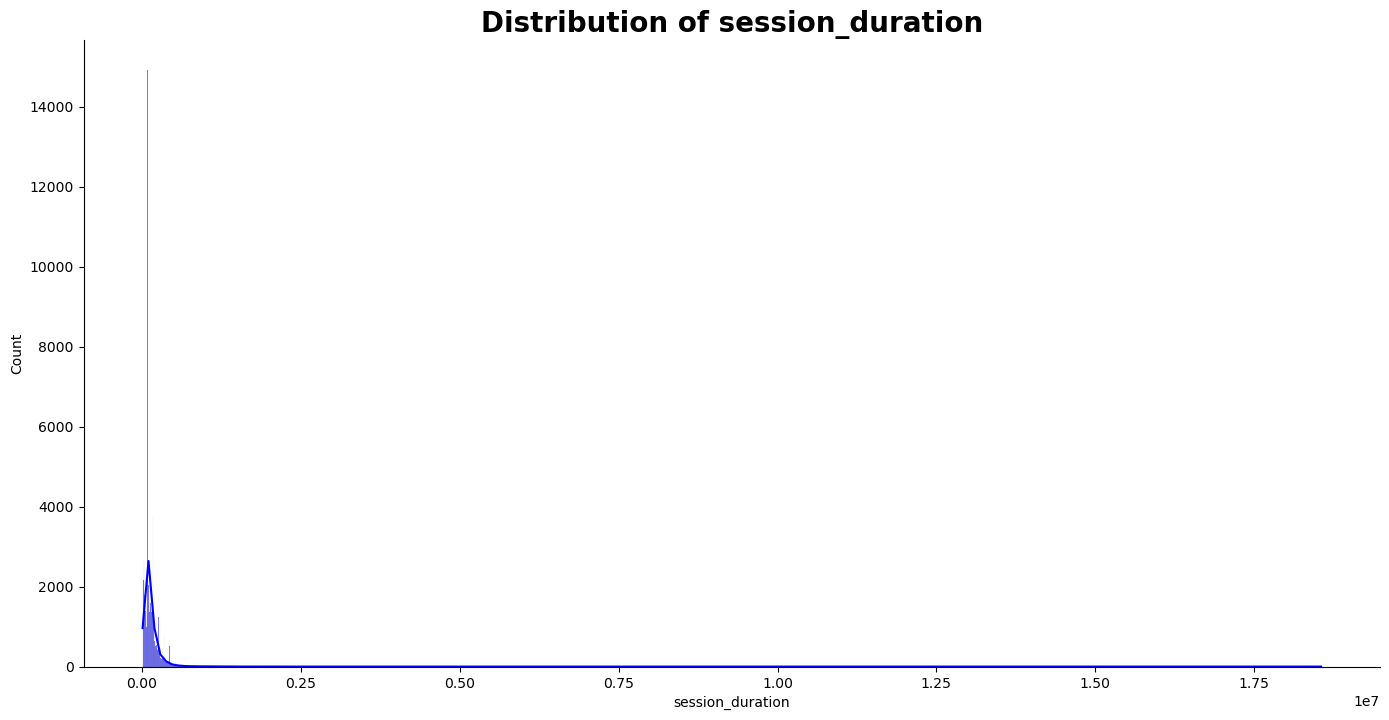

In [13]:
plot_hist(df_customer, "session_duration", "blue")


In [14]:
df_customer[df_customer.columns[1:]].describe()

,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
count,"106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00"
mean,1.39,"146,571.71","2,503,891.64","8,022,645.40","2,499,181.85","16,227,074.20","16,217,736.22","588,700,325.58","587,423,786.30","634,170,854.89","45,919.73","2,868,141.32","651,933.57","15,354,851.41","15,345,475.35","11,562,360.16","11,524,767.93","57,353,449.47",4.49
std,0.81,"186,563.54","1,889,200.77","6,070,427.84","1,898,793.50","12,333,100.61","12,327,021.26","444,430,994.67","444,138,609.41","464,985,514.16","34,745.46","2,174,776.55","495,278.08","11,608,448.33","11,619,419.87","8,739,142.86","8,714,902.15","35,696,764.77",2.88
min,1.00,"7,142.00",12.00,207.00,97.00,53.00,42.00,"2,516.00","3,290.00","8,827,082.00",0.00,3.00,14.00,106.00,35.00,59.00,156.00,"2,866,892.00",0.00
25%,1.00,"72,398.75","1,176,564.75","3,806,869.50","1,185,380.00","7,653,916.50","7,601,092.75","279,543,491.50","277,183,579.75","314,994,241.50","21,612.50","1,342,230.00","306,743.50","7,250,921.00","7,216,482.25","5,451,237.75","5,463,061.00","36,401,909.25",2.00
50%,1.00,"103,136.50","2,266,385.00","7,261,226.00","2,267,410.00","14,614,967.50","14,645,875.00","532,902,800.50","530,207,819.50","570,733,717.00","41,595.00","2,595,124.50","587,612.00","13,880,600.50","13,888,862.50","10,451,768.00","10,381,155.00","46,812,733.00",4.50
75%,2.00,"172,799.00","3,268,742.50","10,436,099.75","3,252,060.75","21,140,317.25","21,141,808.75","767,398,354.25","765,667,570.75","807,829,137.50","59,944.00","3,745,607.00","852,832.25","19,985,931.75","20,017,002.75","15,086,851.25","15,034,856.50","65,860,702.25",7.00
max,18.00,"18,553,754.00","42,743,837.00","116,106,455.00","33,607,211.00","237,883,033.00","199,479,238.00","7,622,035,401.00","8,025,476,831.00","8,156,743,493.00","630,942.00","36,085,397.00","9,013,997.00","215,075,736.00","203,241,873.00","154,789,688.00","152,930,478.00","729,577,380.00",9.00


In [33]:
df_customer.total_session.nunique()

17

In [409]:
df_customer.to_pickle('data/df_customer.pkl')

In [34]:
df_customer.total_session.value_counts()

1.00     77383
2.00     21419
3.00      4418
4.00      1949
5.00       938
6.00       208
7.00        75
8.00        34
9.00        17
10.00       12
12.00        5
11.00        5
17.00        2
15.00        2
18.00        1
16.00        1
13.00        1
Name: total_session, dtype: int64

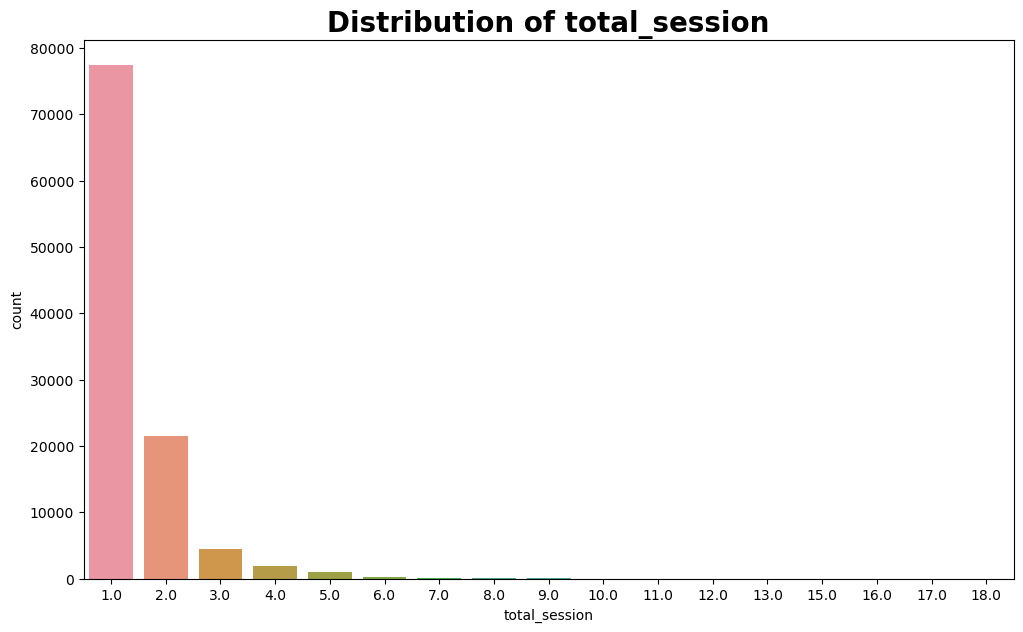

In [408]:
plot_count(df_customer, 'total_session')


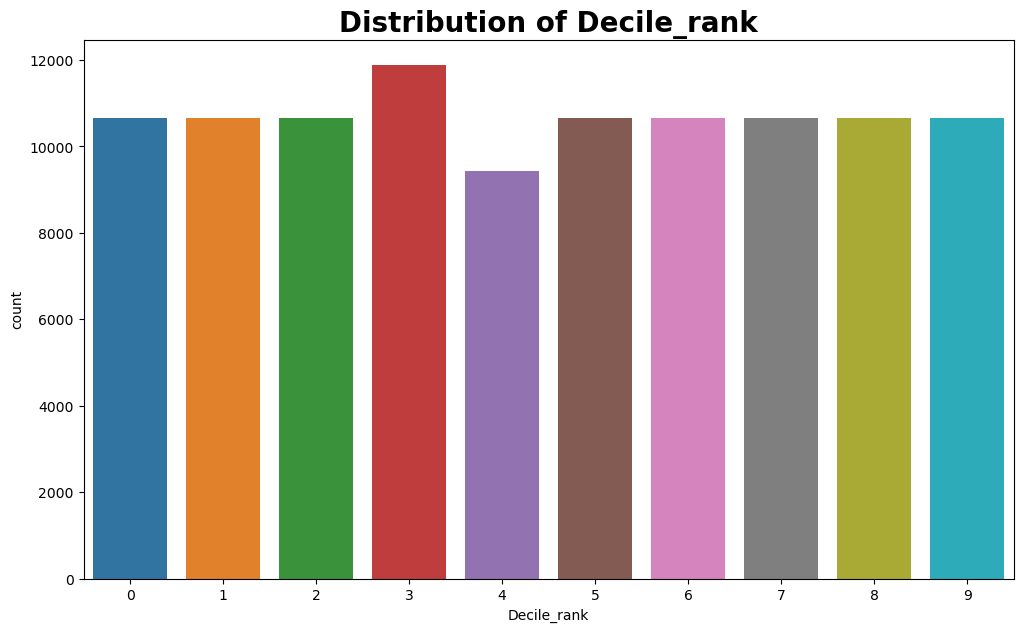

In [36]:
plot_count(df_customer, 'Decile_rank')


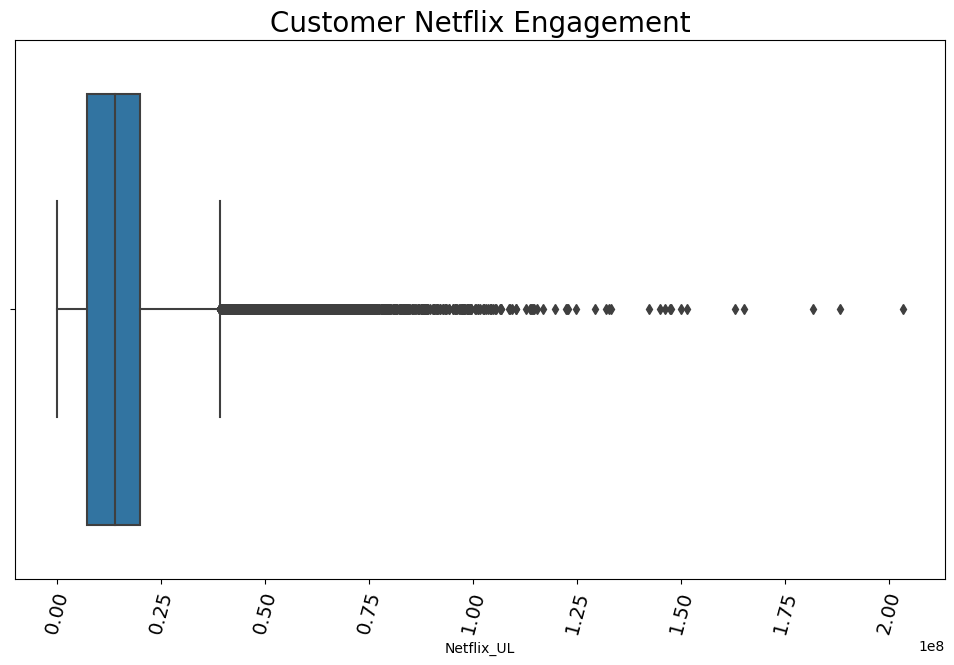

In [37]:
plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

## Outlier Rejection

In [38]:
# df_customer['Netflix_UL'] = fix_outlier(df=df_customer,column='Netflix_UL')

In [39]:
# plot_box(df_customer,'Netflix_UL','Customer Netflix Engagement')

In [40]:
# cols = df_customer.columns[2:]
# for col in cols:
#     df_customer[col] = fix_outlier(df=df_customer,column=col)

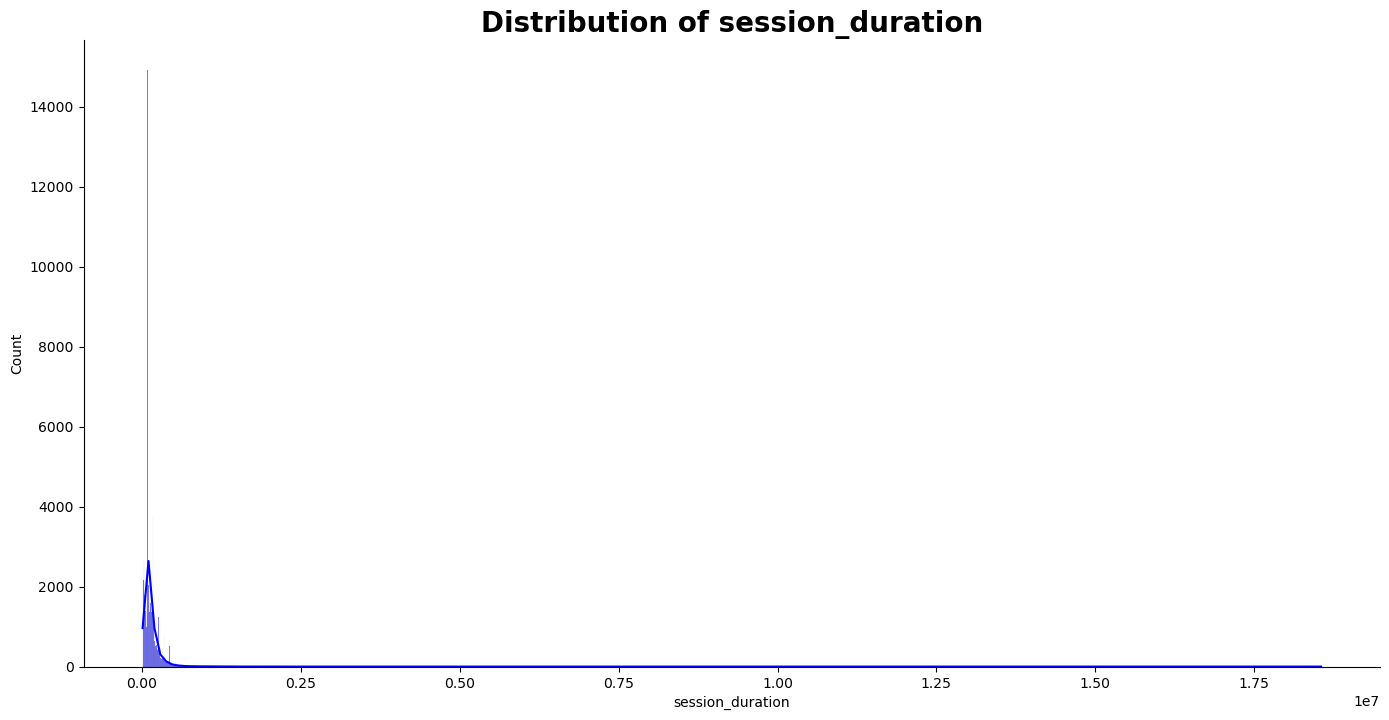

In [41]:
plot_hist(df=df_customer,column='session_duration',color='blue')

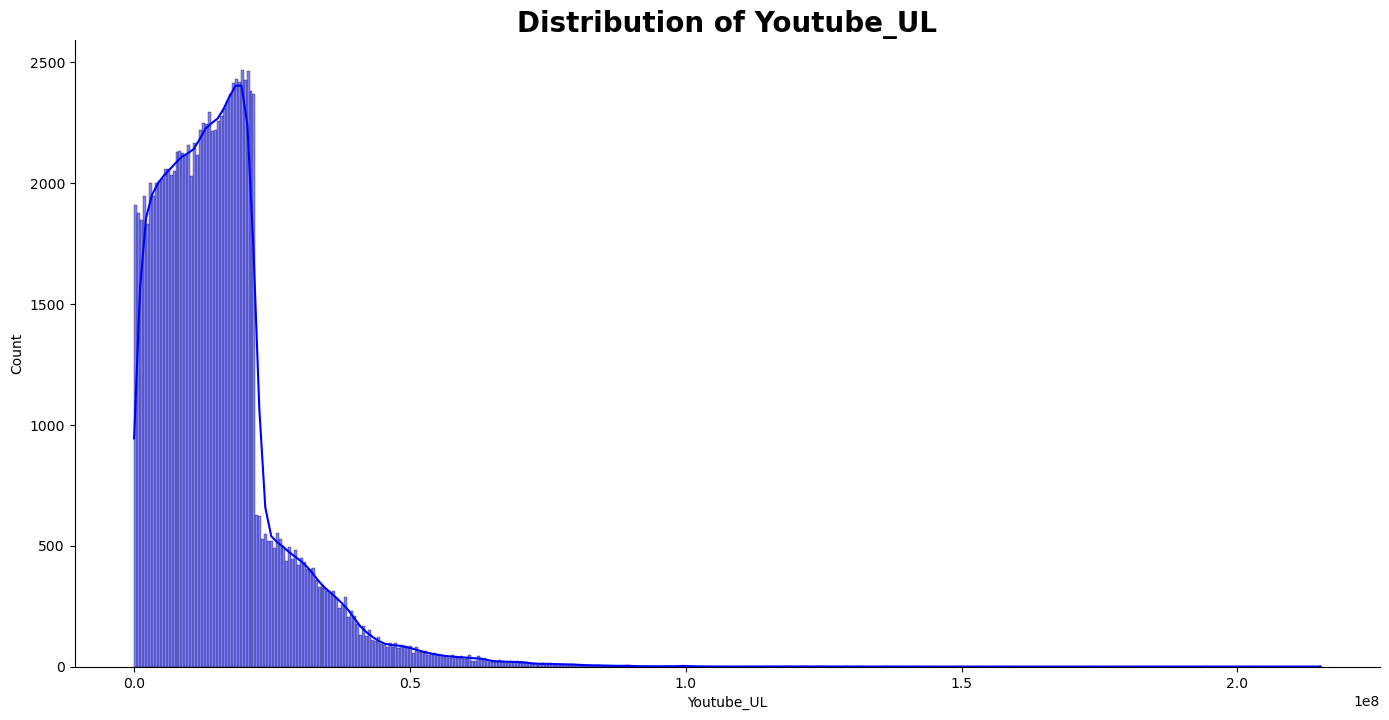

In [407]:
plot_hist(df=df_customer,column='Youtube_UL',color='blue')

# Multivariate Analysis

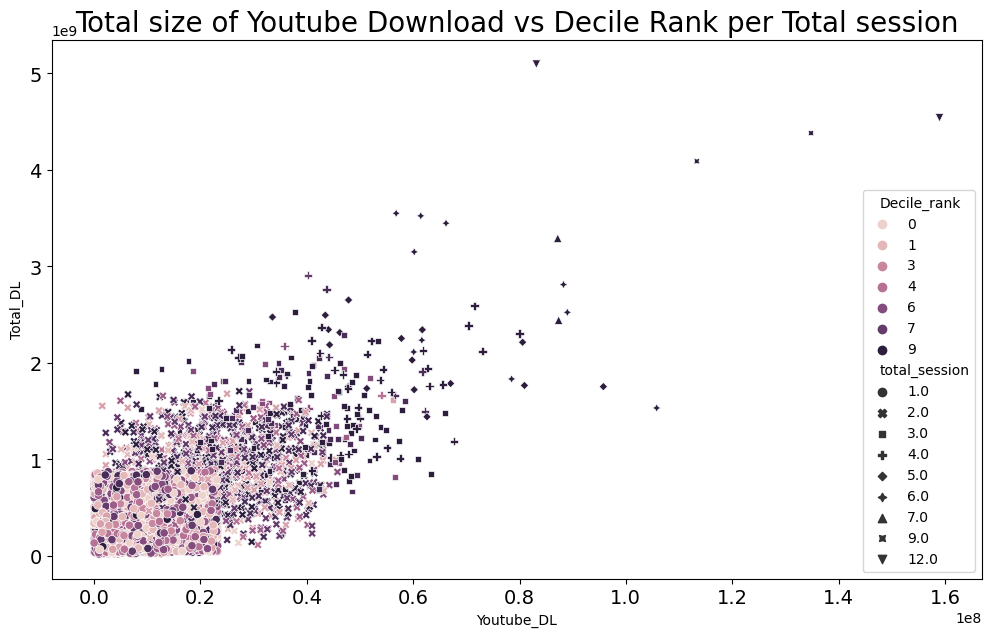

In [43]:
plot_scatter(df_customer.head(6000), x_col="Youtube_DL", y_col="Total_DL", hue="Decile_rank",
             style="total_session", title="Total size of Youtube Download vs Decile Rank per Total session")

<AxesSubplot:>

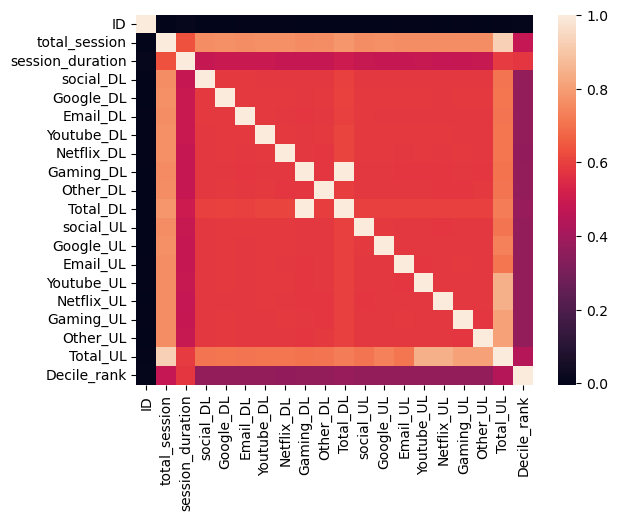

In [44]:
corr_mat = df_customer.corr()
sns.heatmap(corr_mat)

In [45]:
df_customer.describe()

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
count,"106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00","106,470.00"
mean,"45,156,222,844.52",1.39,"146,571.71","2,503,891.64","8,022,645.40","2,499,181.85","16,227,074.20","16,217,736.22","588,700,325.58","587,423,786.30","634,170,854.89","45,919.73","2,868,141.32","651,933.57","15,354,851.41","15,345,475.35","11,562,360.16","11,524,767.93","57,353,449.47",4.49
std,"2,894,656,369,110.26",0.81,"186,563.54","1,889,200.77","6,070,427.84","1,898,793.50","12,333,100.61","12,327,021.26","444,430,994.67","444,138,609.41","464,985,514.16","34,745.46","2,174,776.55","495,278.08","11,608,448.33","11,619,419.87","8,739,142.86","8,714,902.15","35,696,764.77",2.88
min,"33,601,001,722.00",1.00,"7,142.00",12.00,207.00,97.00,53.00,42.00,"2,516.00","3,290.00","8,827,082.00",0.00,3.00,14.00,106.00,35.00,59.00,156.00,"2,866,892.00",0.00
25%,"33,650,879,797.25",1.00,"72,398.75","1,176,564.75","3,806,869.50","1,185,380.00","7,653,916.50","7,601,092.75","279,543,491.50","277,183,579.75","314,994,241.50","21,612.50","1,342,230.00","306,743.50","7,250,921.00","7,216,482.25","5,451,237.75","5,463,061.00","36,401,909.25",2.00
50%,"33,663,653,873.50",1.00,"103,136.50","2,266,385.00","7,261,226.00","2,267,410.00","14,614,967.50","14,645,875.00","532,902,800.50","530,207,819.50","570,733,717.00","41,595.00","2,595,124.50","587,612.00","13,880,600.50","13,888,862.50","10,451,768.00","10,381,155.00","46,812,733.00",4.50
75%,"33,683,450,413.25",2.00,"172,799.00","3,268,742.50","10,436,099.75","3,252,060.75","21,140,317.25","21,141,808.75","767,398,354.25","765,667,570.75","807,829,137.50","59,944.00","3,745,607.00","852,832.25","19,985,931.75","20,017,002.75","15,086,851.25","15,034,856.50","65,860,702.25",7.00
max,"882,397,108,489,451.00",18.00,"18,553,754.00","42,743,837.00","116,106,455.00","33,607,211.00","237,883,033.00","199,479,238.00","7,622,035,401.00","8,025,476,831.00","8,156,743,493.00","630,942.00","36,085,397.00","9,013,997.00","215,075,736.00","203,241,873.00","154,789,688.00","152,930,478.00","729,577,380.00",9.00


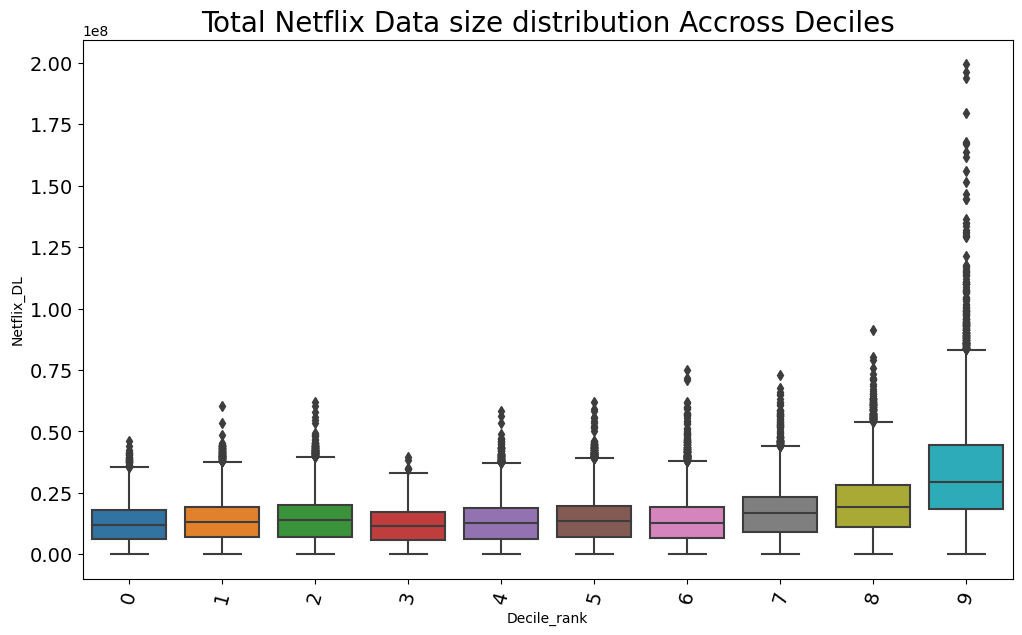

In [46]:
plot_box_multi(df_customer, x_col="Decile_rank", y_col="Netflix_DL", title="Total Netflix Data size distribution Accross Deciles")

In [47]:
dfPair = df_customer[['total_session','Youtube_DL','Email_DL','Google_DL','Total_DL']].head(500)

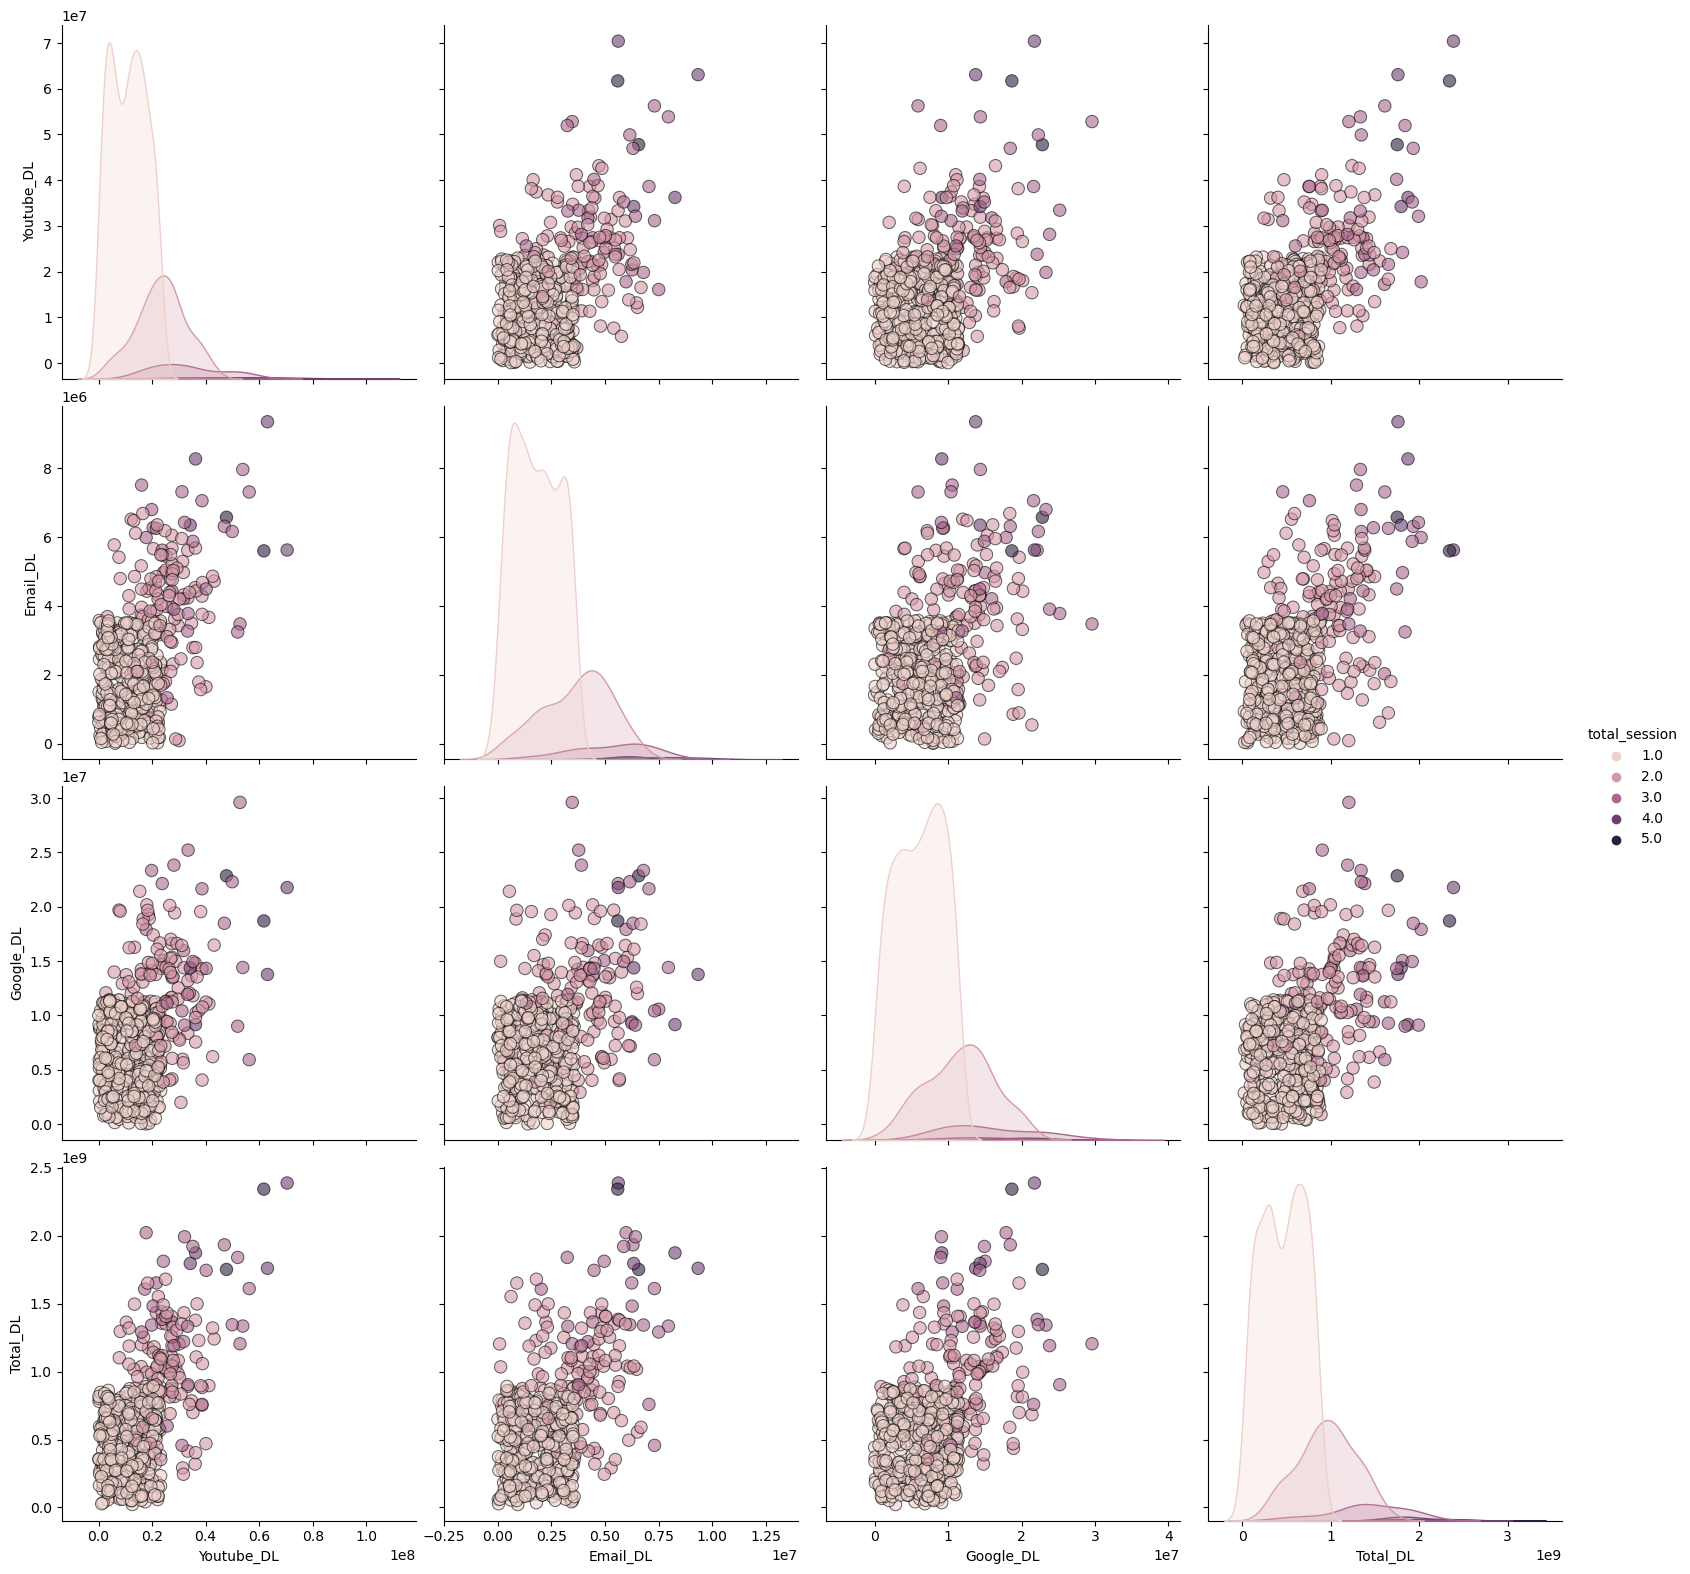

In [48]:
sns.pairplot(dfPair, hue = 'total_session', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [49]:
print("Percentage of User Engagement(Download) Across Multiple Platforms")
df_customer[df_customer.columns[3:10]].sum()/df_customer[df_customer.columns[3:11]].sum()['Total_DL']*100

Percentage of User Engagement(Download) Across Multiple Platforms


social_DL     0.39
Google_DL     1.27
Email_DL      0.39
Youtube_DL    2.56
Netflix_DL    2.56
Gaming_DL    92.83
Other_DL     92.63
dtype: float64

In [50]:
df_customer[df_customer.columns[3:11]].sum()

social_DL       266,589,343,401.00
Google_DL       854,171,055,291.00
Email_DL        266,087,891,120.00
Youtube_DL    1,727,696,590,249.00
Netflix_DL    1,726,702,375,398.00
Gaming_DL    62,678,923,664,295.00
Other_DL     62,543,010,527,236.00
Total_DL     67,520,170,919,754.00
dtype: float64

In [51]:
print("Percentage of User Engagement(Upload) Across Multiple Platforms")

df_customer[df_customer.columns[11:-2]].sum()/df_customer[df_customer.columns[11:-1]].sum()['Total_UL']*100

Percentage of User Engagement(Upload) Across Multiple Platforms


social_UL     0.08
Google_UL     5.00
Email_UL      1.14
Youtube_UL   26.77
Netflix_UL   26.76
Gaming_UL    20.16
Other_UL     20.09
dtype: float64

In [52]:
df_customer[df_customer.columns[11:-1]].sum()

social_UL        4,889,073,187.00
Google_UL      305,371,006,798.00
Email_UL        69,411,367,297.00
Youtube_UL   1,634,831,030,138.00
Netflix_UL   1,633,832,760,130.00
Gaming_UL    1,231,044,486,243.00
Other_UL     1,227,042,041,294.00
Total_UL     6,106,421,765,087.00
dtype: float64

## Dimensionality Reduction

In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)

In [54]:
# scaling the dataset
df_customer_scaled = df_customer.copy()
df_customer_scaled.iloc[:,2:] = scale_dataframe(df = df_customer_scaled.iloc[:,2:],cols=df_customer.columns[2:])

In [55]:
df_customer_scaled

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
0,"33,601,001,722.00",1.00,0.01,0.05,0.03,0.02,0.06,0.05,0.11,0.05,0.10,0.04,0.03,0.05,0.03,0.08,0.01,0.06,0.05,0.56
1,"33,601,001,754.00",1.00,0.01,0.06,0.04,0.08,0.02,0.00,0.01,0.03,0.01,0.10,0.03,0.05,0.03,0.05,0.10,0.01,0.05,0.78
2,"33,601,002,511.00",1.00,0.01,0.07,0.03,0.07,0.01,0.08,0.07,0.06,0.07,0.08,0.00,0.09,0.09,0.01,0.06,0.04,0.05,0.67
3,"33,601,007,832.00",1.00,0.00,0.01,0.05,0.06,0.02,0.01,0.05,0.00,0.05,0.05,0.10,0.01,0.01,0.00,0.02,0.07,0.02,0.11
4,"33,601,008,617.00",2.00,0.00,0.07,0.12,0.07,0.04,0.13,0.17,0.10,0.17,0.08,0.13,0.12,0.15,0.12,0.04,0.18,0.13,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106465,"33,789,996,170.00",1.00,0.00,0.01,0.06,0.01,0.03,0.07,0.09,0.04,0.08,0.10,0.02,0.06,0.09,0.00,0.02,0.03,0.03,0.00
106466,"33,789,997,247.00",1.00,0.01,0.01,0.01,0.07,0.02,0.03,0.06,0.03,0.05,0.09,0.11,0.00,0.07,0.01,0.06,0.04,0.05,0.67
106467,"3,197,020,876,596.00",1.00,0.05,0.02,0.07,0.03,0.04,0.05,0.02,0.06,0.02,0.07,0.05,0.08,0.01,0.08,0.09,0.02,0.05,1.00
106468,"337,000,037,000,919.00",1.00,0.01,0.01,0.07,0.09,0.07,0.05,0.07,0.02,0.07,0.04,0.04,0.04,0.09,0.10,0.06,0.03,0.07,0.89


In [56]:
df_customer_scaled.head(5)

,ID,total_session,session_duration,social_DL,Google_DL,Email_DL,Youtube_DL,Netflix_DL,Gaming_DL,Other_DL,Total_DL,social_UL,Google_UL,Email_UL,Youtube_UL,Netflix_UL,Gaming_UL,Other_UL,Total_UL,Decile_rank
0,"33,601,001,722.00",1.00,0.01,0.05,0.03,0.02,0.06,0.05,0.11,0.05,0.10,0.04,0.03,0.05,0.03,0.08,0.01,0.06,0.05,0.56
1,"33,601,001,754.00",1.00,0.01,0.06,0.04,0.08,0.02,0.00,0.01,0.03,0.01,0.10,0.03,0.05,0.03,0.05,0.10,0.01,0.05,0.78
2,"33,601,002,511.00",1.00,0.01,0.07,0.03,0.07,0.01,0.08,0.07,0.06,0.07,0.08,0.00,0.09,0.09,0.01,0.06,0.04,0.05,0.67
3,"33,601,007,832.00",1.00,0.00,0.01,0.05,0.06,0.02,0.01,0.05,0.00,0.05,0.05,0.10,0.01,0.01,0.00,0.02,0.07,0.02,0.11
4,"33,601,008,617.00",2.00,0.00,0.07,0.12,0.07,0.04,0.13,0.17,0.10,0.17,0.08,0.13,0.12,0.15,0.12,0.04,0.18,0.13,0.11


In [57]:
x = df_customer.iloc[:,1:-1]

In [58]:
x_scaled= scale_dataframe(x,cols=x.columns)

In [ ]:
# the elbow occurs at 3

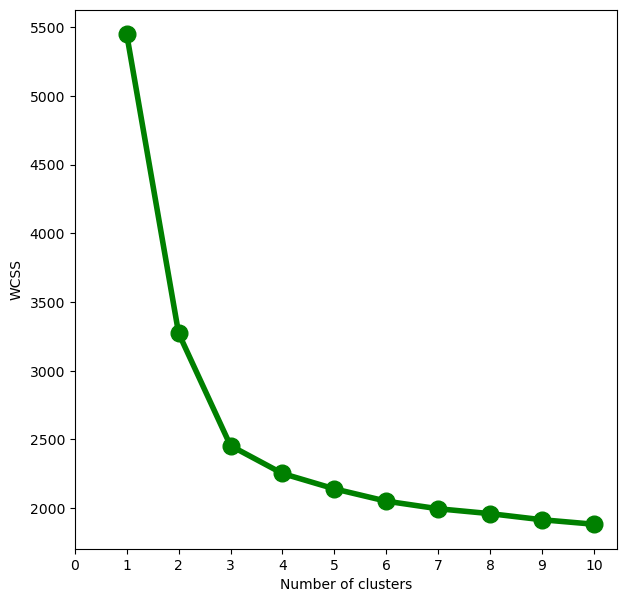

In [59]:
# Find the optimal cluster using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(x_scaled)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### PCA

In [60]:
pca = PCA(2)
data = pca.fit_transform(x_scaled)

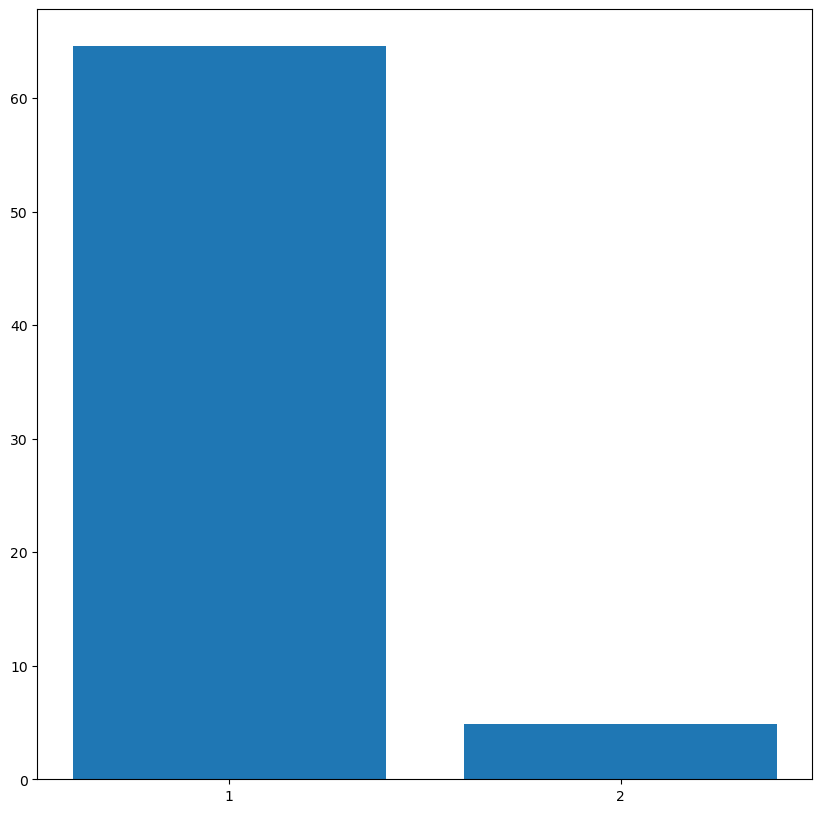

In [61]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [62]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
# print(label)

model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(x_scaled)

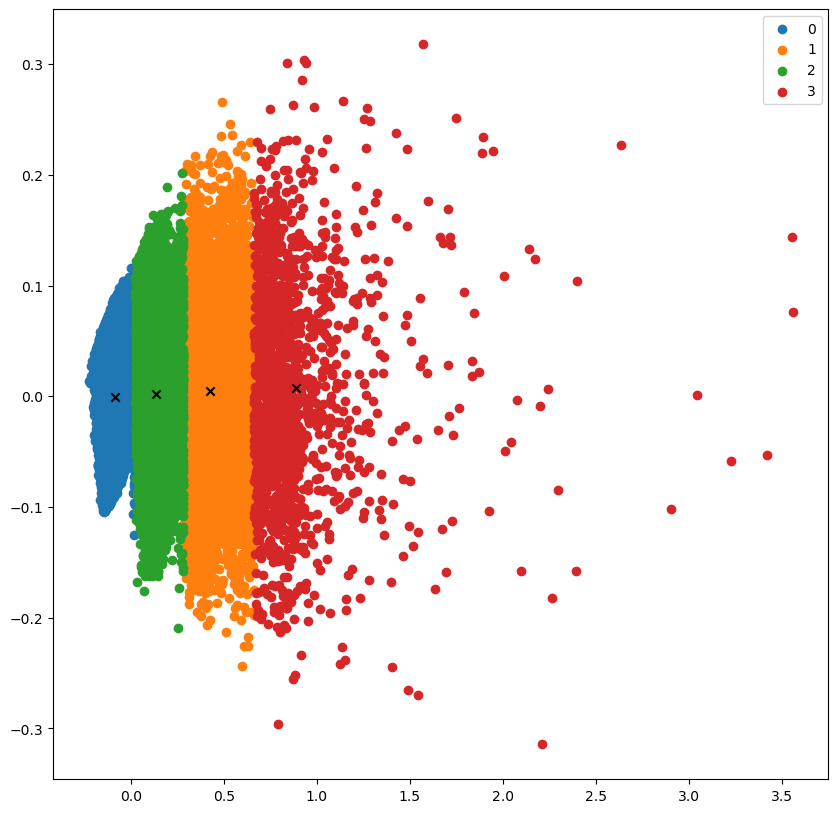

In [63]:
centers = np.array(model1.cluster_centers_)
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

# Task 2

In [84]:
# sessions frequency is set as df_customer['total_session']
# the duration is also presented as df_customer['session_duration']


In [64]:
df_engagement = df_customer[['ID','total_session','session_duration','Total_DL','Total_UL']].copy()

## Task 2.1 show Top values

In [68]:
# Top 10 customers with high session frequency
df_engagement.iloc[df_engagement.total_session.nlargest(10).index]


,ID,total_session,session_duration,Total_DL,Total_UL
13467,"33,626,320,676.00",18.00,"8,791,927.00","7,301,516,540.00","669,650,721.00"
6404,"33,614,892,860.00",17.00,"9,966,898.00","8,156,743,493.00","689,483,001.00"
13123,"33,625,779,332.00",17.00,"18,553,754.00","7,770,043,342.00","729,577,380.00"
36909,"33,659,725,664.00",16.00,"4,035,428.00","7,081,602,462.00","624,260,321.00"
76076,"33,675,877,202.00",15.00,"4,865,947.00","7,309,541,816.00","581,568,792.00"
92583,"33,760,536,639.00",15.00,"9,279,434.00","7,811,295,382.00","703,478,581.00"
64882,"33,667,163,239.00",13.00,"8,744,914.00","5,052,067,690.00","566,326,364.00"
658,"33,603,127,838.00",12.00,"6,287,761.00","4,540,607,412.00","435,587,631.00"
1270,"33,604,515,716.00",12.00,"5,207,990.00","5,096,079,437.00","391,775,856.00"
13934,"33,627,080,969.00",12.00,"4,703,516.00","5,309,478,912.00","445,251,947.00"


In [69]:
# Top 10 customers with longer session duration
df_engagement.iloc[df_engagement.session_duration.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL
13123,"33,625,779,332.00",17.00,"18,553,754.00","7,770,043,342.00","729,577,380.00"
6404,"33,614,892,860.00",17.00,"9,966,898.00","8,156,743,493.00","689,483,001.00"
92583,"33,760,536,639.00",15.00,"9,279,434.00","7,811,295,382.00","703,478,581.00"
13467,"33,626,320,676.00",18.00,"8,791,927.00","7,301,516,540.00","669,650,721.00"
64882,"33,667,163,239.00",13.00,"8,744,914.00","5,052,067,690.00","566,326,364.00"
50096,"33,662,840,755.00",9.00,"6,614,270.00","3,593,673,609.00","406,424,372.00"
56950,"33,664,693,736.00",9.00,"6,288,730.00","5,279,826,530.00","402,180,804.00"
658,"33,603,127,838.00",12.00,"6,287,761.00","4,540,607,412.00","435,587,631.00"
65786,"33,667,456,716.00",6.00,"5,649,882.00","2,334,299,294.00","266,222,647.00"
92238,"33,760,413,819.00",12.00,"5,321,667.00","6,610,851,624.00","521,518,890.00"


In [70]:
# Top 10 customers with largest session total trafic (Download)
df_engagement.iloc[df_engagement.Total_DL.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL
6404,"33,614,892,860.00",17.00,"9,966,898.00","8,156,743,493.00","689,483,001.00"
92583,"33,760,536,639.00",15.00,"9,279,434.00","7,811,295,382.00","703,478,581.00"
13123,"33,625,779,332.00",17.00,"18,553,754.00","7,770,043,342.00","729,577,380.00"
76076,"33,675,877,202.00",15.00,"4,865,947.00","7,309,541,816.00","581,568,792.00"
13467,"33,626,320,676.00",18.00,"8,791,927.00","7,301,516,540.00","669,650,721.00"
36909,"33,659,725,664.00",16.00,"4,035,428.00","7,081,602,462.00","624,260,321.00"
62803,"33,666,464,084.00",11.00,"4,536,757.00","6,903,439,962.00","405,060,976.00"
92238,"33,760,413,819.00",12.00,"5,321,667.00","6,610,851,624.00","521,518,890.00"
57031,"33,664,712,899.00",11.00,"2,927,785.00","6,400,773,755.00","471,244,453.00"
86137,"33,698,792,269.00",11.00,"5,169,128.00","6,010,556,021.00","530,343,105.00"


In [404]:
# Top 10 customers with largest session total trafic (Upload)
df_engagement.iloc[df_engagement.Total_DL.nlargest(10).index]

,ID,total_session,session_duration,Total_DL,Total_UL,Label
6404,"33,614,892,860.00",17.00,"9,966,898.00","8,156,743,493.00","689,483,001.00",3
92583,"33,760,536,639.00",15.00,"9,279,434.00","7,811,295,382.00","703,478,581.00",3
13123,"33,625,779,332.00",17.00,"18,553,754.00","7,770,043,342.00","729,577,380.00",3
76076,"33,675,877,202.00",15.00,"4,865,947.00","7,309,541,816.00","581,568,792.00",3
13467,"33,626,320,676.00",18.00,"8,791,927.00","7,301,516,540.00","669,650,721.00",3
36909,"33,659,725,664.00",16.00,"4,035,428.00","7,081,602,462.00","624,260,321.00",3
62803,"33,666,464,084.00",11.00,"4,536,757.00","6,903,439,962.00","405,060,976.00",3
92238,"33,760,413,819.00",12.00,"5,321,667.00","6,610,851,624.00","521,518,890.00",3
57031,"33,664,712,899.00",11.00,"2,927,785.00","6,400,773,755.00","471,244,453.00",3
86137,"33,698,792,269.00",11.00,"5,169,128.00","6,010,556,021.00","530,343,105.00",3


In [405]:
df_engagement.iloc[:,:-1].to_pickle('data/df_engagement.pkl')

### 2.1.1. Data Normalization

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_engagement.iloc[:,1:])
scaled = scaler.fit_transform(df_engagement.iloc[:,1:])
df_engagement_kmeans = df_engagement.copy()
df_engagement_kmeans.iloc[:,1:] = pd.DataFrame(scaled, columns=df_engagement.columns[1:])

In [74]:
df_engagement_kmeans

,ID,total_session,session_duration,Total_DL,Total_UL
0,"33,601,001,722.00",-0.49,-0.16,0.45,-0.60
1,"33,601,001,754.00",-0.49,0.19,-1.10,-0.60
2,"33,601,002,511.00",-0.49,-0.06,-0.17,-0.51
3,"33,601,007,832.00",-0.49,-0.52,-0.50,-1.04
4,"33,601,008,617.00",0.75,-0.59,1.57,1.03
...,...,...,...,...,...
106465,"33,789,996,170.00",-0.49,-0.74,0.12,-0.86
106466,"33,789,997,247.00",-0.49,-0.03,-0.41,-0.61
106467,"3,197,020,876,596.00",-0.49,3.92,-0.94,-0.56
106468,"337,000,037,000,919.00",-0.49,0.57,-0.20,-0.02


### 2.1.2 K-means Classification

In [146]:
data_eng = df_engagement_kmeans.iloc[:,1:]
kmeans_model_eng = KMeans(n_clusters = 3, init = "k-means++")
label_eng = kmeans_model_eng.fit_predict(data_eng)

### 2.1.3 compute min, max and average for each Cluster

In [137]:
# insert the K-means label into the dataset
df_engagement['Label'] = label
df_engagement_kmeans['Label'] = label

In [138]:
columns_req = df_engagement.iloc[:,1:-1].columns

In [139]:
def compute_minmax(df,i):
    return df[df.Label==i].iloc[:,1:-1].describe()
def compute_total(df,i):
    return df[df.Label==i].iloc[:,1:-1].sum()

In [180]:
def compute_data(df,cluster,cols):
    features = {}
    for k in cols:
        mean = compute_data_mean(df=df,cluster=cluster,feature=k)
        min_ = compute_data_min(df=df,cluster=cluster,feature=k)
        max_ = compute_data_max(df=df,cluster=cluster,feature=k)
        total = compute_total(df,i)[k]
        features[k] = [mean,min_,max_,total]
        
            
    return features


def compute_data2(df,cluster,cols):
    mean = {}
    min_ = {}
    max_ = {}
    total = {}
    for i in range(cluster):
        print("\nCluster: "+str(i))
        for k in cols:
            print(k)
            print("\tMean: \t" + str(compute_minmax(df,i).loc['mean'][k]))
            print("\tMinimum: \t" + str(compute_minmax(df,i).loc['min'][k]))
            print("\tMaximum: \t" + str(compute_minmax(df,i).loc['max'][k]))
#             mean[i,k] = compute_minmax(df,i).loc['mean'][k]
#             min_[i,k] = compute_minmax(df,i).loc['min'][k]
#             max_[i,k] = compute_minmax(df,i).loc['max'][k]
#             total[i,k] = compute_total(df,i)[k]
            
#     return mean,max_,min_,total

    

In [177]:
def compute_data_mean(df,cluster,feature):
    return compute_minmax(df,i=cluster).loc['mean'][feature]
def compute_data_min(df,cluster,feature):
    return compute_minmax(df,i=cluster).loc['min'][feature]
def compute_data_max(df,cluster,feature):
    return compute_minmax(df,i=cluster).loc['max'][feature]

In [252]:
# compute_data_max(df=df_engagement_kmeans,cluster=2,feature='total_session')

In [257]:
cluster_0 = compute_data(df = df_engagement,cluster=0,cols=['total_session','session_duration'])
cluster_1 = compute_data(df = df_engagement,cluster=1,cols=['total_session','session_duration'])
cluster_2 = compute_data(df = df_engagement,cluster=2,cols=['total_session','session_duration'])


In [266]:
def result_return(features,clusters):
    for feature in features:
        mean[feature] = [clusters[0][feature][0],clusters[1][feature][0],clusters[2][feature][0]]
        min_[feature] = [clusters[0][feature][1],clusters[1][feature][1],clusters[2][feature][1]]
        max_[feature] = [clusters[0][feature][2],clusters[1][feature][2],clusters[2][feature][2]]
        total[feature] = [clusters[0][feature][3],clusters[1][feature][3],clusters[2][feature][3]]
    return mean,min_,max_,total
    # mean['total_session'] = [cluster_0['total_session'][0],cluster_1['total_session'][0],cluster_2['total_session'][0]]


In [268]:
clusters = [cluster_0,cluster_1,cluster_2]
mean,min_,max_,total = result_return(['session_duration','total_session'],clusters)

In [277]:

x = [0,1,2]
y = min_['total_session']

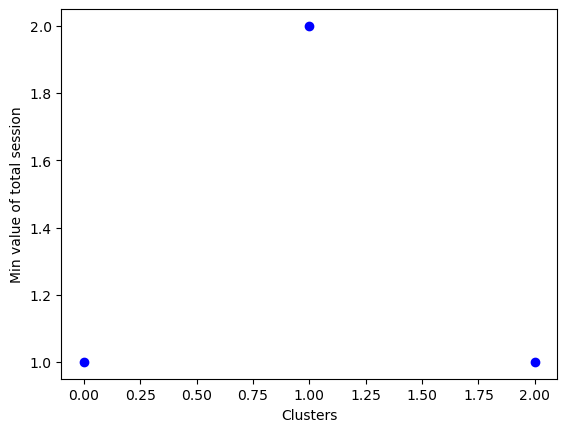

In [278]:
plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.xlabel('Clusters')
plt.ylabel('Min value of total session')
plt.show()

In [207]:
# df_cluster0_plot = pd.DataFrame.from_dict(cluster_0,orient='index',columns=['mean','min','max','total'])
# df_cluster1_plot = pd.DataFrame.from_dict(cluster_1,orient='index',columns=['mean','min','max','total'])
# df_cluster2_plot = pd.DataFrame.from_dict(cluster_2,orient='index',columns=['mean','min','max','total'])


In [80]:
# mean, max_, min_,total =compute_data2(df_engagement,3,columns_req)

### 2.1.4 Top Values

In [279]:
# Top 10 engaged users per application
df_customer.iloc[df_customer.Youtube_DL.nlargest(10).index][['ID','Youtube_DL']]

,ID,Youtube_DL
13123,"33,625,779,332.00","237,883,033.00"
6404,"33,614,892,860.00","199,823,443.00"
92583,"33,760,536,639.00","194,068,298.00"
13934,"33,627,080,969.00","187,323,322.00"
92238,"33,760,413,819.00","174,245,981.00"
86137,"33,698,792,269.00","166,900,329.00"
13467,"33,626,320,676.00","164,048,706.00"
658,"33,603,127,838.00","158,976,704.00"
76076,"33,675,877,202.00","158,665,235.00"
57031,"33,664,712,899.00","153,074,482.00"


In [280]:
# top 3 most used applications / Per Download
df_customer[df_customer.columns[3:9]].sum().nlargest(3)

Gaming_DL    62,678,923,664,295.00
Youtube_DL    1,727,696,590,249.00
Netflix_DL    1,726,702,375,398.00
dtype: float64

In [281]:
# top 3 most used applications / Per Upload
df_customer[df_customer.columns[11:17]].sum().nlargest(3)

Youtube_UL   1,634,831,030,138.00
Netflix_UL   1,633,832,760,130.00
Gaming_UL    1,231,044,486,243.00
dtype: float64

In [295]:
ind = df_customer[df_customer.columns[3:9]].sum().nlargest(3).index
val = df_customer[df_customer.columns[3:9]].sum().nlargest(3).values


<AxesSubplot:>

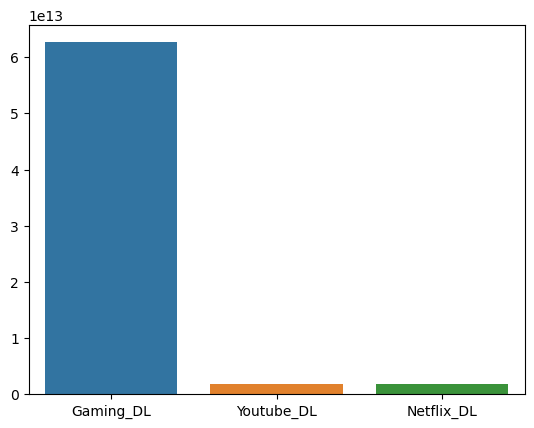

In [298]:
# plot of top used applications
sns.barplot(x=ind,y=val)

In [282]:
# ul = dict(df_customer[df_customer.columns[11:17]].sum().nlargest(3))
# dl = dict(df_customer[df_customer.columns[3:9]].sum().nlargest(3))


In [283]:
# dff = pd.DataFrame.from_dict(ul,orient='index',columns=['UL'])
# dff['DL'] = pd.DataFrame.from_dict(dl,orient='index').values


In [ ]:
# Download

In [299]:
ind = df_customer[df_customer.columns[11:17]].sum().nlargest(3).index
val = df_customer[df_customer.columns[11:17]].sum().nlargest(3).values


<AxesSubplot:>

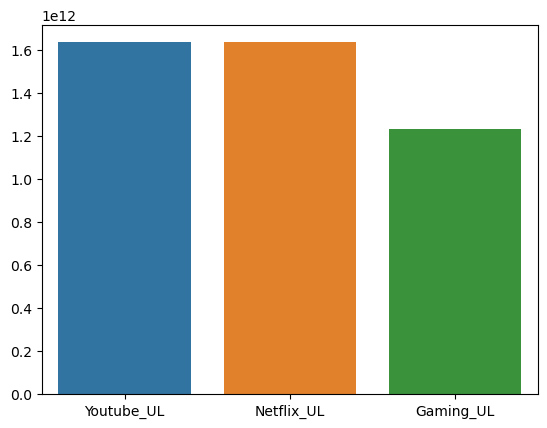

In [300]:
# plot of top used applications per download
sns.barplot(x=ind,y=val)

### 2.1.4 Kmeans cluster number with Elbow Method

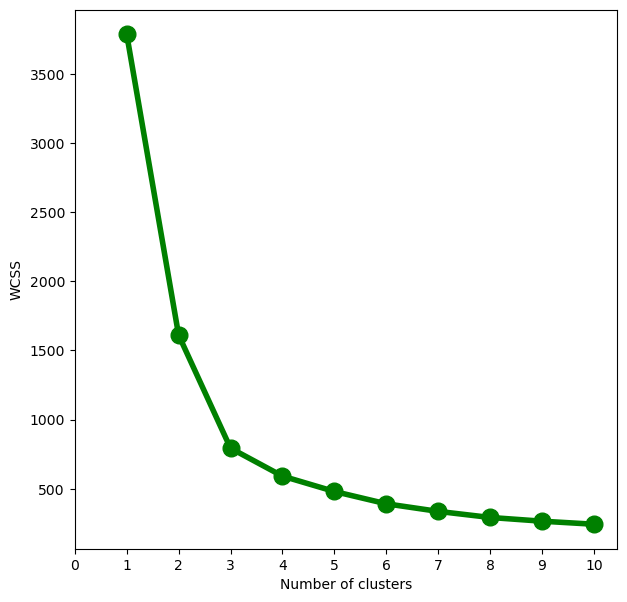

In [285]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [289]:
# since elbow occured at 3, hence the optimal number of clusters for the mall data is 5 

model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(data)

In [290]:
y_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

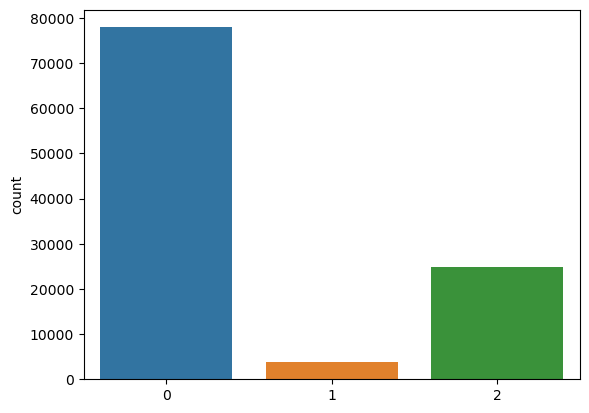

In [291]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)


<!-- - Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric  -->
<!-- - Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.  -->
- Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
<!-- - Aggregate user total traffic per application and derive the top 10 most engaged users per application -->
- Plot the top 3 most used applications using appropriate charts.  
- Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
    - What is the optimized value of k (use elbow method for this)?  
    - Interpret your findings. 


# Task 3

## 3.1 Aggregate

In [301]:
def avg_cols(dfa,dfb,cols,names):
    i = 0
    for col in cols:
        col_val = dfa.groupby('MSISDN/Number')[col].mean()
        dfb.insert(dfb.shape[1], names[i],list(col_val) )
        i+=1
    return dfb


In [302]:
def aggregate_avg(dfa,dfb,cols,names):
    
    for i in range(len(cols)):
        col_val = list(dfa.groupby('MSISDN/Number')[cols[i]].mean())
        dfb.insert(dfb.shape[1],names[i],col_val)
    return dfb

    

In [303]:
df_temp = pd.DataFrame(df_customer.iloc[:,0].copy())

exp_cols = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)'] 
exp_names = ['Avg_TCP_DL','Avg_TCP_UL','Avg_RTT_DL','Avg_RTT_UL','Avg_Bearer_TP_DL','Avg_Bearer_TP_UL']

df_experience = aggregate_avg(dfa=df_knn,dfb=df_temp,cols=exp_cols[:2],names=exp_names[:2])
df_experience = aggregate_cols(dfa=df_knn,dfb=df_experience,cols=exp_cols[2:],names=exp_names[2:])


In [304]:
df_experience

,ID,Avg_TCP_DL,Avg_TCP_UL,Avg_RTT_DL,Avg_RTT_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
0,"33,601,001,722.00","79,202,653.33","6,063,109.00",46.00,0.00,37.00,39.00
1,"33,601,001,754.00","16,323,546.00","66,630.00",30.00,1.00,48.00,51.00
2,"33,601,002,511.00","484,125.67","70,430.33",20.33,1.33,48.00,49.00
3,"33,601,007,832.00","1,066.00","35,880.67",69.00,15.00,204.00,44.00
4,"33,601,008,617.00","4,730,044.50","80,386.83",114.00,5.00,"40,395.00","16,449.00"
...,...,...,...,...,...,...,...
106465,"33,789,996,170.00","215,044.00","3,001.00",42.00,10.00,"9,978.00",387.00
106466,"33,789,997,247.00","212,861.33","13,090.33",34.00,6.00,68.00,48.00
106467,"3,197,020,876,596.00","1,815,890.33","51,140.67",31.00,17.00,1.00,0.00
106468,"337,000,037,000,919.00","53,431,735.67","161,359.00",464.33,6.00,11.00,22.00


### 3.2 Top Values

In [306]:
# Top max values
df_experience.iloc[df_experience.Avg_TCP_DL.nlargest(10).index][['ID','Avg_TCP_DL']]

,ID,Avg_TCP_DL
85469,"33,698,575,965.00","4,289,487,601.00"
32141,"33,658,706,088.00","4,288,060,364.00"
57815,"33,664,907,178.00","4,268,431,996.00"
31810,"33,658,633,234.00","4,254,643,827.00"
61827,"33,666,125,485.00","4,211,189,017.00"
69826,"33,668,768,421.00","4,166,590,984.00"
43468,"33,661,305,358.00","4,131,045,758.00"
48162,"33,662,396,708.00","4,117,753,418.00"
63882,"33,666,824,231.00","3,968,072,422.00"
97856,"33,762,643,398.00","3,785,294,754.00"


In [307]:
# Top min values
df_experience.iloc[df_experience.Avg_TCP_DL.nsmallest(10).index][['ID','Avg_TCP_DL']]

,ID,Avg_TCP_DL
56412,"33,664,535,559.00",2.00
94971,"33,761,543,605.00",2.00
71444,"33,669,309,035.00",4.00
71517,"33,669,328,368.00",4.00
86835,"33,699,002,991.00",4.00
87027,"33,699,060,950.00",4.00
94863,"33,761,506,920.00",4.00
94980,"33,761,544,858.00",4.00
95423,"33,761,619,710.00",4.00
100258,"33,763,938,150.00",4.00


In [308]:
# Top max values
df_experience.iloc[df_experience.Avg_RTT_DL.nlargest(10).index][['ID','Avg_RTT_DL']]

,ID,Avg_RTT_DL
47806,"33,662,317,023.00","96,923.00"
41789,"33,660,874,265.00","64,666.00"
79949,"33,683,692,867.00","54,847.00"
85367,"33,698,551,167.00","45,923.00"
96063,"33,761,813,523.00","36,977.00"
69888,"33,668,791,629.00","36,125.00"
93501,"33,760,941,100.00","26,971.00"
1701,"33,606,788,933.00","26,250.00"
73971,"33,671,816,754.00","25,602.00"
103953,"33,781,865,588.00","25,374.00"


In [310]:
# Top min values
df_experience.iloc[df_experience.Avg_RTT_DL.nsmallest(10).index][['ID','Avg_RTT_DL']]

,ID,Avg_RTT_DL
28762,"33,652,982,188.00",0.00
40719,"33,660,637,039.00",0.00
44582,"33,661,575,382.00",0.00
65854,"33,667,477,967.00",0.00
88579,"33,699,538,565.00",0.00
98185,"33,762,753,209.00",0.00
38918,"33,660,204,450.00",2.00
83083,"33,695,045,499.00",4.00
35896,"33,659,493,541.00",5.00
106185,"33,788,060,063.00",5.00


### 3.3 Compute & Report

In [330]:
df_temp = df.copy()
df_temp.dropna(subset=['Handset Type'],inplace=True)

In [331]:
df_exp_dist = pd.DataFrame(np.sort(list(df_temp['Handset Type'].unique())),columns=['Handset_Type'])

In [332]:
df_exp_dist

,Handset_Type
0,A-Link Telecom I. Cubot A5
1,A-Link Telecom I. Cubot Note Plus
2,A-Link Telecom I. Cubot Note S
3,A-Link Telecom I. Cubot Nova
4,A-Link Telecom I. Cubot Power
...,...
1391,Zte Zte Blade C2 Smartphone Android By Sfr Sta...
1392,Zyxel Communicat. Lte7460
1393,Zyxel Communicat. Sbg3600
1394,Zyxel Communicat. Zyxel Wah7706


In [333]:
dist_col = ['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)'] 
dist_name = ['Avg_TCP_DL','Avg_TCP_UL','Avg_Bearer_TP_DL','Avg_Bearer_TP_UL']


for item in range(4):
    col_val = df_temp.groupby('Handset Type')[dist_col[item]].sum()
    df_exp_dist.insert(df_exp_dist.shape[1], dist_name[item],list(col_val) )

In [334]:
dff = pd.DataFrame(df_temp.groupby('Handset Type')[dist_col[0]].mean())
dff['TCP DL Retrans. Vol (Bytes)'].max()

1357279140.0

In [335]:
df_exp_dist.isnull().sum()

Handset_Type        0
Avg_TCP_DL          0
Avg_TCP_UL          0
Avg_Bearer_TP_DL    0
Avg_Bearer_TP_UL    0
dtype: int64

In [336]:
df_exp_dist.iloc[df_exp_dist['Avg_TCP_UL'].nlargest(10).index]

,Handset_Type,Avg_TCP_DL,Avg_TCP_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
316,Huawei B528S-23A,"1,025,709,501,973.00","33,094,986,731.00","720,826,232.00","112,684,240.00"
337,Huawei E5180,"61,640,018,725.00","1,841,129,632.00","55,039,474.00","9,329,154.00"
75,Apple iPhone X (A1901),"7,439,190,005.00","566,109,687.00","49,328,216.00","7,719,281.00"
49,Apple iPhone 6 (A1586),"10,724,743,222.00","407,848,047.00","59,387,996.00","9,347,012.00"
53,Apple iPhone 6S (A1688),"11,355,287,889.00","355,207,202.00","65,169,580.00","9,128,651.00"
69,Apple iPhone 8 Plus (A1897),"4,205,767,602.00","325,623,359.00","33,537,386.00","5,724,354.00"
1395,undefined,"8,392,857,040.00","304,134,000.00","82,553,695.00","7,861,038.00"
341,Huawei E5573,"15,781,951,406.00","219,470,128.00","6,491,569.00","1,080,652.00"
56,Apple iPhone 6S Plus (A1687),"2,152,502,012.00","216,163,140.00","15,075,117.00","2,244,902.00"
66,Apple iPhone 8 (A1905),"5,522,633,060.00","204,328,184.00","50,359,567.00","7,746,985.00"


In [337]:
df_experience

,ID,Avg_TCP_DL,Avg_TCP_UL,Avg_RTT_DL,Avg_RTT_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
0,"33,601,001,722.00","79,202,653.33","6,063,109.00",46.00,0.00,37.00,39.00
1,"33,601,001,754.00","16,323,546.00","66,630.00",30.00,1.00,48.00,51.00
2,"33,601,002,511.00","484,125.67","70,430.33",20.33,1.33,48.00,49.00
3,"33,601,007,832.00","1,066.00","35,880.67",69.00,15.00,204.00,44.00
4,"33,601,008,617.00","4,730,044.50","80,386.83",114.00,5.00,"40,395.00","16,449.00"
...,...,...,...,...,...,...,...
106465,"33,789,996,170.00","215,044.00","3,001.00",42.00,10.00,"9,978.00",387.00
106466,"33,789,997,247.00","212,861.33","13,090.33",34.00,6.00,68.00,48.00
106467,"3,197,020,876,596.00","1,815,890.33","51,140.67",31.00,17.00,1.00,0.00
106468,"337,000,037,000,919.00","53,431,735.67","161,359.00",464.33,6.00,11.00,22.00


In [402]:
df_experience.to_pickle('data/df_experience.pkl')

## Task 3.4

In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_experience.iloc[:,1:])
scaled = scaler.fit_transform(df_experience.iloc[:,1:])
df_experience_kmeans = df_experience.copy()
df_experience_kmeans.iloc[:,1:] = pd.DataFrame(scaled, columns=df_experience.columns[1:])

In [339]:
df_experience_kmeans

,ID,Avg_TCP_DL,Avg_TCP_UL,Avg_RTT_DL,Avg_RTT_UL,Avg_Bearer_TP_DL,Avg_Bearer_TP_UL
0,"33,601,001,722.00",0.62,0.43,-0.13,-0.20,-0.49,-0.34
1,"33,601,001,754.00",0.02,-0.04,-0.16,-0.19,-0.49,-0.34
2,"33,601,002,511.00",-0.13,-0.04,-0.17,-0.19,-0.49,-0.34
3,"33,601,007,832.00",-0.14,-0.04,-0.10,-0.08,-0.49,-0.34
4,"33,601,008,617.00",-0.09,-0.04,-0.03,-0.16,0.58,1.98
...,...,...,...,...,...,...,...
106465,"33,789,996,170.00",-0.13,-0.05,-0.14,-0.12,-0.23,-0.29
106466,"33,789,997,247.00",-0.13,-0.05,-0.15,-0.15,-0.49,-0.34
106467,"3,197,020,876,596.00",-0.12,-0.04,-0.16,-0.06,-0.49,-0.35
106468,"337,000,037,000,919.00",0.37,-0.03,0.50,-0.15,-0.49,-0.35


In [368]:
data_exp = df_experience_kmeans.iloc[:,1:]
kmeans_model_exp = KMeans(n_clusters = 3, init = "k-means++")
label_exp = kmeans_model_exp.fit_predict(data_exp)

In [369]:
df_experience['Label'] = label_exp
# df_experience_kmeans['Label'] = label

/home/owon/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

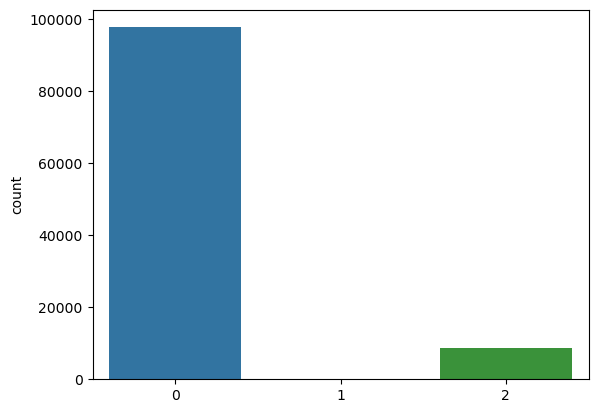

In [345]:
sns.countplot(label)

In [346]:
# this result shows most of the customers have a bad experience

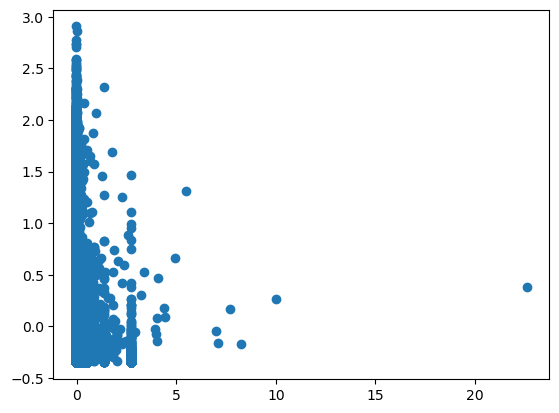

In [348]:
import matplotlib.pyplot as plt
#filter rows of original data
filtered_label0 = df_experience_kmeans[label == 0]

#plotting the results
plt.scatter(filtered_label0.iloc[:,2] , filtered_label0.iloc[:,6])
plt.show()

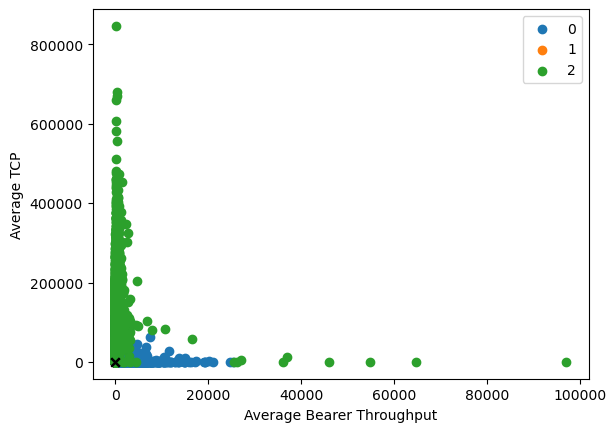

In [355]:
#Getting unique labels
 
u_labels = np.unique(label)
centers = kmeans_model_exp.cluster_centers_
a =3
b=5
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_experience.iloc[label == i , a] , df_experience.iloc[label == i , b] , label = i)
plt.legend()
plt.scatter(centers[:,a], centers[:,b], marker="x", color='k')
plt.ylabel("Average TCP")
plt.xlabel("Average Bearer Throughput")
plt.show()

# Task 4 Satisfaction Analysis

### Task 4. 1 - Write a python program to assign satisfaction

In [356]:
from sklearn.metrics.pairwise import euclidean_distances


In [357]:
def get_euclidean(model,dfa,dfb,col_name):
    centers = model.cluster_centers_
    score = euclidean_distances(dfa.iloc[:,1:],centers)
    dfb[col_name] = pd.DataFrame(score)[0]  
    return dfb

In [358]:
df_sat = pd.DataFrame(data=df_customer.iloc[:,0].values,columns=['User_ID'])


In [359]:
df_sat = get_euclidean(dfa=df_experience_kmeans,dfb=df_sat,model=kmeans_model_exp,col_name='Experience_score')
df_sat = get_euclidean(dfa=df_engagement_kmeans,dfb=df_sat,model=kmeans_model_eng,col_name='Engagement_score')


In [361]:
df_sat

,User_ID,Experience_score,Engagement_score
0,"33,601,001,722.00",0.88,2.83
1,"33,601,001,754.00",0.37,3.33
2,"33,601,002,511.00",0.38,2.89
3,"33,601,007,832.00",0.34,3.37
4,"33,601,008,617.00",2.32,1.27
...,...,...,...
106465,"33,789,996,170.00",0.18,3.17
106466,"33,789,997,247.00",0.36,3.02
106467,"3,197,020,876,596.00",0.36,4.83
106468,"337,000,037,000,919.00",0.75,2.69


### 4.2 Top 10 satisfied customer

In [365]:
df_sat['Satisfaction_score'] = (df_sat['Experience_score']+ df_sat['Engagement_score'])/2

In [366]:
# top 10 satisfied
df_sat.loc[df_sat.Satisfaction_score.nlargest(10).index]

,User_ID,Experience_score,Engagement_score,Satisfaction_score
99647,"33,763,588,772.00",192.39,3.26,97.82
47806,"33,662,317,023.00",147.60,3.11,75.35
56971,"33,664,698,321.00",137.24,3.38,70.31
13467,"33,626,320,676.00",85.74,54.36,70.05
58451,"33,665,090,461.00",135.51,3.01,69.26
13123,"33,625,779,332.00",5.25,102.71,53.98
70657,"33,669,054,076.00",101.39,4.60,52.99
41789,"33,660,874,265.00",98.41,0.36,49.39
64882,"33,667,163,239.00",44.46,50.33,47.39
79949,"33,683,692,867.00",83.44,2.85,43.15


### 4.3 Build Regression Model

<AxesSubplot:xlabel='Experience_score', ylabel='Engagement_score'>

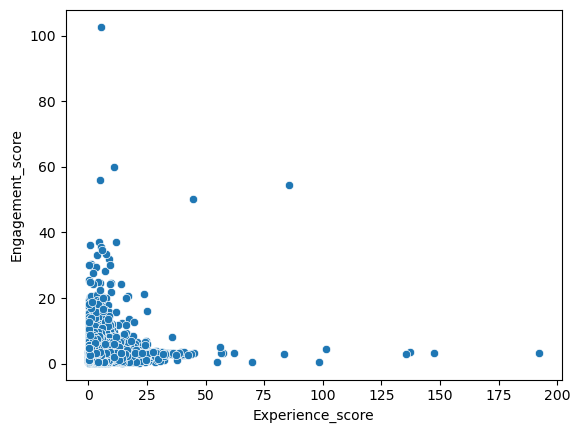

In [370]:
sns.scatterplot( x='Experience_score',y='Engagement_score' , data=df_sat)

In [372]:
df_sat

,User_ID,Experience_score,Engagement_score,Satisfaction_score
0,"33,601,001,722.00",0.88,2.83,1.85
1,"33,601,001,754.00",0.37,3.33,1.85
2,"33,601,002,511.00",0.38,2.89,1.64
3,"33,601,007,832.00",0.34,3.37,1.86
4,"33,601,008,617.00",2.32,1.27,1.80
...,...,...,...,...
106465,"33,789,996,170.00",0.18,3.17,1.67
106466,"33,789,997,247.00",0.36,3.02,1.69
106467,"3,197,020,876,596.00",0.36,4.83,2.60
106468,"337,000,037,000,919.00",0.75,2.69,1.72


In [374]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [375]:
x_log = df_sat.iloc[:,1:3]
y_log = df_sat['Satisfaction_score']
x_log_train,x_log_test,y_log_train,y_log_test = train_test_split(x_log,y_log,test_size=0.3)


In [376]:
# Logistic Regression

from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LinearRegression()
log_model.fit(x_log_train, y_log_train)

LinearRegression()

In [377]:
# performance evaluation
prediction_train = log_model.predict(x_log_train)
prediction_test = log_model.predict(x_log_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE_train = mean_squared_error(y_log_train, prediction_train)
MSE_test = mean_squared_error(y_log_test,prediction_test)


In [378]:
log_model.predict(x_log_test.head(1))

array([1.87454742])

In [379]:
y_log_test.head(1)

20134   1.87
Name: Satisfaction_score, dtype: float64

In [382]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

def load_model(filename): 
    return pickle.load(open(filename, 'rb'))


In [383]:
save_model(model=log_model,filename='models/log_reg.pkl')

### 4.4 Run Kmeans (n_clusters=2)

In [385]:
data_sat = df_sat.iloc[:,1:-1]
kmeans_model_sat = KMeans(n_clusters = 2, init = "k-means++")
label_sat = kmeans_model_sat.fit_predict(data_sat)

In [386]:
df_sat['Label'] = label_sat

In [390]:
# for i in range(len(cols)):
#         col_val = list(dfa.groupby('MSISDN/Number')[cols[i]].mean())
#         dfb.insert(dfb.shape[1],names[i],col_val)
    

### 4.5 Aggregate per cluster

In [411]:
df_sat.groupby('Label')['Satisfaction_score','Experience_score'].mean()

/tmp/ipykernel_29703/3599461899.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Satisfaction_score,Experience_score
Label,,
0,7.71,11.33
1,1.74,0.81


In [410]:
df_sat.groupby('Label')['Label'].count()

Label
0      2194
1    104276
Name: Label, dtype: int64

In [ ]:
# this shows that the customer should not buy this company

### 4.6 Export final database

In [401]:
# the final dataframe
df_sat.iloc[:,:-1]

,User_ID,Experience_score,Engagement_score,Satisfaction_score
0,"33,601,001,722.00",0.88,2.83,1.85
1,"33,601,001,754.00",0.37,3.33,1.85
2,"33,601,002,511.00",0.38,2.89,1.64
3,"33,601,007,832.00",0.34,3.37,1.86
4,"33,601,008,617.00",2.32,1.27,1.80
...,...,...,...,...
106465,"33,789,996,170.00",0.18,3.17,1.67
106466,"33,789,997,247.00",0.36,3.02,1.69
106467,"3,197,020,876,596.00",0.36,4.83,2.60
106468,"337,000,037,000,919.00",0.75,2.69,1.72


In [444]:
df_sat.iloc[:,:-1].to_pickle('data/df_sat_final.pkl')